Segmentace obrazu
=================

* [Vstup] intenzitní obraz
* [Výstup] intenzitní obraz, kde hodnota šedi udává číslo objektu
* [Cíl] Nalézt objekty


Prahování
----


![Alt text style](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/fram022.jpg "vstupní obraz" )


Interaktivní určení prahu

![prah 1 ](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/prah1.jpg)


Automatické určení prahu

![prah 2 ](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/prah2.jpg)

### Python example - coins

In [1]:
%pylab inline --no-import-all

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
import skimage.segmentation
import scipy
# import skimage.color
# import skimage.data
# import skimage.filters 

Populating the interactive namespace from numpy and matplotlib


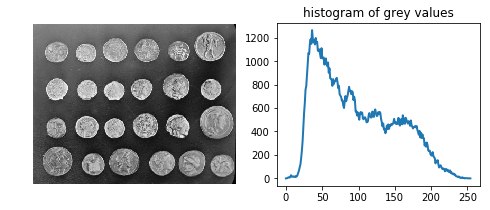

In [2]:
coins = skimage.data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(coins, cmap=plt.cm.gray, interpolation='nearest')

plt.axis('off')
plt.subplot(122)
plt.plot(hist[1][:-1], hist[0], lw=2)
plt.title('histogram of grey values')

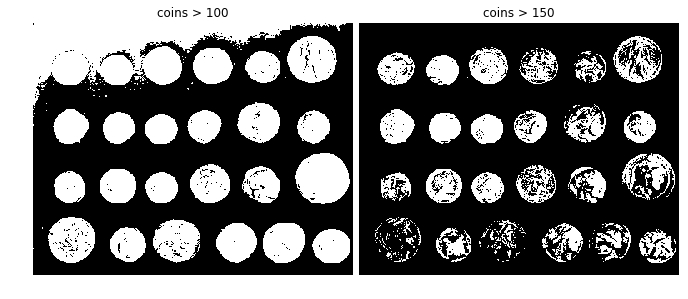

In [3]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.imshow(coins > 100, cmap=plt.cm.gray, interpolation='nearest')
plt.title('coins > 100')
plt.axis('off')

plt.subplot(122)
plt.imshow(coins > 150, cmap=plt.cm.gray, interpolation='nearest')
plt.title('coins > 150')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

### Označování nasegmentovaných oblastí (labeling)

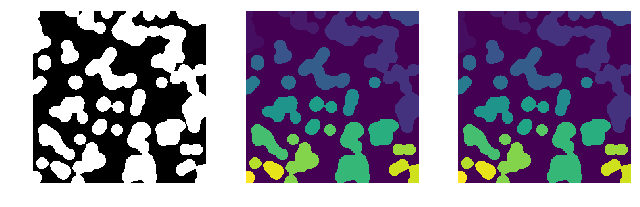

In [4]:
from skimage import morphology
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

#
n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
blobs = im > 0.7 * im.mean()

all_labels = morphology.label(blobs)
blobs_labels = morphology.label(blobs, background=0)

plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels)
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels)
plt.axis('off')

plt.tight_layout()
plt.show()

Pro vizualizaci je možné využívat i barevný výstup
    

In [5]:
from skimage.color import label2rgb
image_label_overlay = label2rgb(morphology.label(segmentation), image=coins)
plt.imshow(image_label_overlay)

NameError: name 'segmentation' is not defined

### Otsu segmentation

In [ ]:
#%pylab --no-import-all inline

#Imports
import matplotlib.pyplot as plt

# Prahování

from skimage import data
from skimage import filters
from skimage import exposure

camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val


plt.figure(figsize=(9, 3.5))
plt.gray()
plt.subplot(131)
plt.imshow(camera)

plt.subplot(132)
plt.imshow(mask)



hist, bins_center = exposure.histogram(camera)
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.show()
#plt.tight_layout()


## Segmentace založená na detekci hran ##

Původní obraz

![input image](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/hranice2.jpg)

dafa

![edge of image](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/hraniceprah.jpg)

určení hranice na základě znalosti tvaru

jestliže známe předpokládaný tvar objektu můžeme chybějící části doplnit

![doplneni](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/hranicespoj.jpg)

určení hranice na základě zpřesňování

spojíme koncové body hranic a další bod hranice hledáme na kolmici ve středu spojnice

![vylepsene doplneni](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/hranice21.jpg)


gradientní pole

![gvf](http://www.kky.zcu.cz/uploads/courses/zdo/lesson6/hranice3.jpg)

### Hranově založená segmentace v pythonu

In [ ]:
from skimage.filter import canny
edges = canny(coins/255.)

plt.figure(figsize=(6, 4))
plt.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('Canny detector')

In [ ]:
from scipy import ndimage

fill_coins = ndimage.binary_fill_holes(edges)

plt.figure(figsize=(6, 4))
plt.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('Filling the holes')

## Segmentace založená na analýze oblastí (Region-based Segmentaiton)

In [ ]:
from skimage.filter import sobel
import skimage.morphology

elevation_map = sobel(coins)

plt.figure(figsize=(4, 3))
plt.imshow(elevation_map, cmap=plt.cm.jet, interpolation='nearest')
plt.axis('off')
plt.title('elevation_map')

In [ ]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

plt.figure(figsize=(4, 3))
plt.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
plt.axis('off')
plt.title('markers')

In [ ]:
segmentation = skimage.morphology.watershed(elevation_map, markers)

plt.figure(figsize=(6, 4))
plt.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('segmentation')

## Active Contour Model (Snakes)

$$
     E_{snake}^*=\int\limits_0^1E_{snake}(\mathbf{v}(s))\,ds=                    
     \int\limits_0^1 \left\{                                                     
         \left[ E_{internal}\mathbf{v}(s)\right] +                               
         \left[ E_{image}\left(\mathbf{v}(s)\right) \right] +                    
         \left[ E_{con}(\mathbf{v}(s)) \right]                                   
     \right\}\,ds
$$

![snakes](https://camo.githubusercontent.com/62ae00a104c95a12b435953c66be2865d6578a07/68747470733a2f2f7261772e6769746875622e636f6d2f706d6e65696c612f6d6f727068736e616b65732f6d61737465722f6578616d706c65732f73746172666973682e676966)
![snakes_lakes](https://camo.githubusercontent.com/eed709a8c7285ecae36ccaeca0e6a282d15c1e70/68747470733a2f2f7261772e6769746875622e636f6d2f706d6e65696c612f6d6f727068736e616b65732f6d61737465722f6578616d706c65732f6c616b65732e676966)
![snakes_3d](https://camo.githubusercontent.com/6c6a6c797db8ba22fc755a42560e74ece7fff0cd/68747470733a2f2f7261772e6769746875622e636f6d2f706d6e65696c612f6d6f727068736e616b65732f6d61737465722f6578616d706c65732f64656e64726974652e676966)

https://github.com/pmneila/morphsnakes

In [ ]:
# Active contours is implemented for scipy versions 0.14.0 and above.
# print scipy.__version__

img = skimage.data.astronaut()
img = skimage.color.rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

# snake
snake = skimage.segmentation.active_contour(skimage.filters.gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

# visualization
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

## Graph-Cut

http://cmp.felk.cvut.cz/~smidm/python-packages-for-graph-cuts-on-images.html

http://docs.opencv.org/3.1.0/d8/d83/tutorial_py_grabcut.html
